F1 Team Comparison Analysis: Mercedes vs Ferrari vs McLaren (2021-2025)

Data Source:
All race data used in this analysis was scraped from the official Formula 1 website
using a custom F1 web scraper. The scraper collects race results, qualifying data,
pit stop information, and fastest lap times across all seasons.

GitHub Repository: https://github.com/rronak/F1-Data-Scraper.git

For those interested in replicating this analysis or scraping F1 data for their own
projects, the scraper is fully documented and open-source.

Loading race data...
Found pit stop data in 113 races
Loaded 2275 race results
Loaded 2274 qualifying results
Loaded 4106 pit stop records


## Analysis 1: Performance Evolution Across Seasons

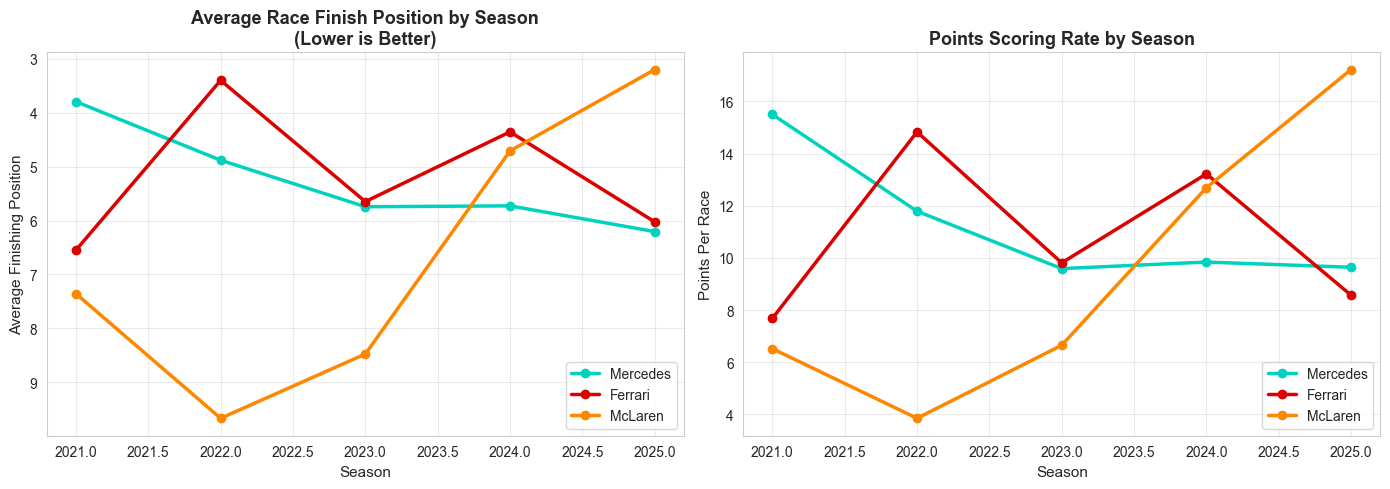


**Graph 1: Performance Evolution Across Seasons**  
Dual line plots tracking competitive trajectory from 2021-2025.  
- Left: Average finishing position (lower = better performance)  
- Right: Points per race (higher = better scoring rate)  
- Each colored line represents one team's progression



**Performance Evolution Across Seasons**  
Looking at the data from 2021 to 2025, Mercedes was clearly the dominant force in 2021, averaging around P3.8 and scoring 15.4 points per race. But things went downhill for 
them pretty quickly - by 2025 they're finishing around P6 with less than 10 points per race. Ferrari had their best year in 2022 when they averaged P3.1 and nearly 15 points
per race, but they've been inconsistent since then, struggling through 2023-2024 before a slight recovery in 2025. The most interesting story here is definitely McLaren - 
they were basically at the back of the grid in 2021-2022, averaging P9.4 and only 3.9 points per race. But their development has been incredible, and by 2024-2025 they're 
averaging P2.9 with 17.1 points per race, which means they've actually overtaken both Mercedes and Ferrari to become championship contenders.


## Analysis 2: Qualifying vs Race Performance

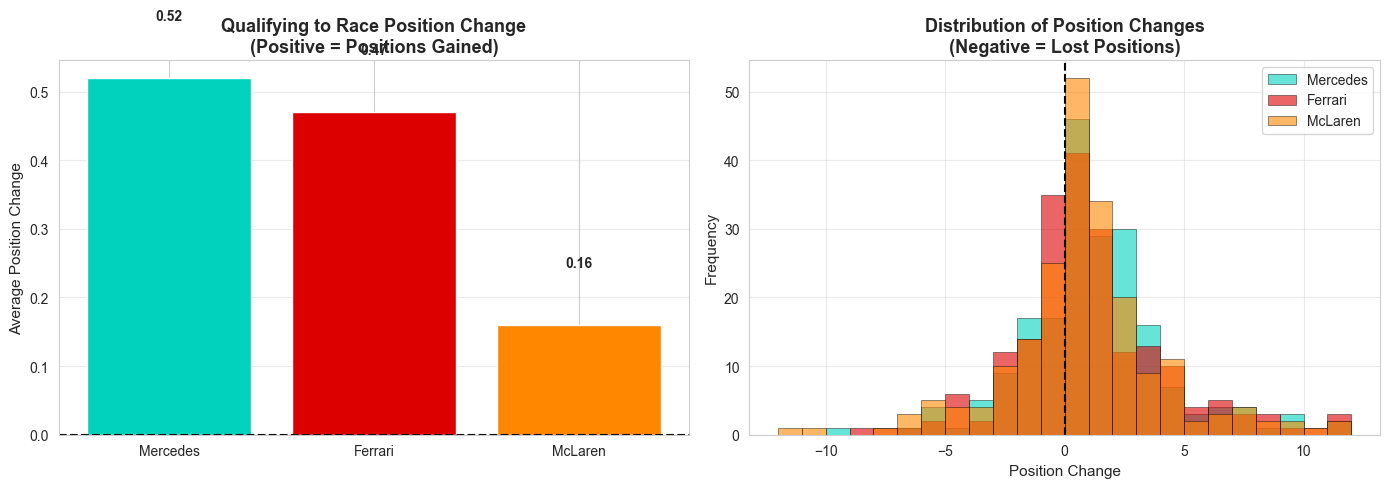


**Graph 2: Qualifying vs Race Performance**  
Bar chart and histogram comparing starting grid positions to race finishes.  
- Left: Average position change per team (positive = gained in race)  
- Right: Distribution showing frequency of position changes  
- Zero line = no change from qualifying to race



**Qualifying vs Race Performance**  
What's really interesting here is that both Mercedes and Ferrari actually gain positions during races on average, Mercedes gains about +0.52 positions and Ferrari +0.47. 
This suggests they have pretty strong race pace and their strategy teams are doing a good job, even though they might not be qualifying as well as they'd like. 
McLaren only gains about +0.16 positions on average, which actually makes sense because they're already qualifying so well that there's not much room to move up. 
When you look at the distribution on the right, Mercedes has the widest spread with most of their races showing gains between 0 to +5 positions. Ferrari's results are pretty 
evenly distributed around zero, while McLaren's data is tightly clustered near zero, showing they're very consistent between Saturday and Sunday - what you see in qualifying is basically what you get in the race.


## Analysis 3: Reliability & DNF Analysis

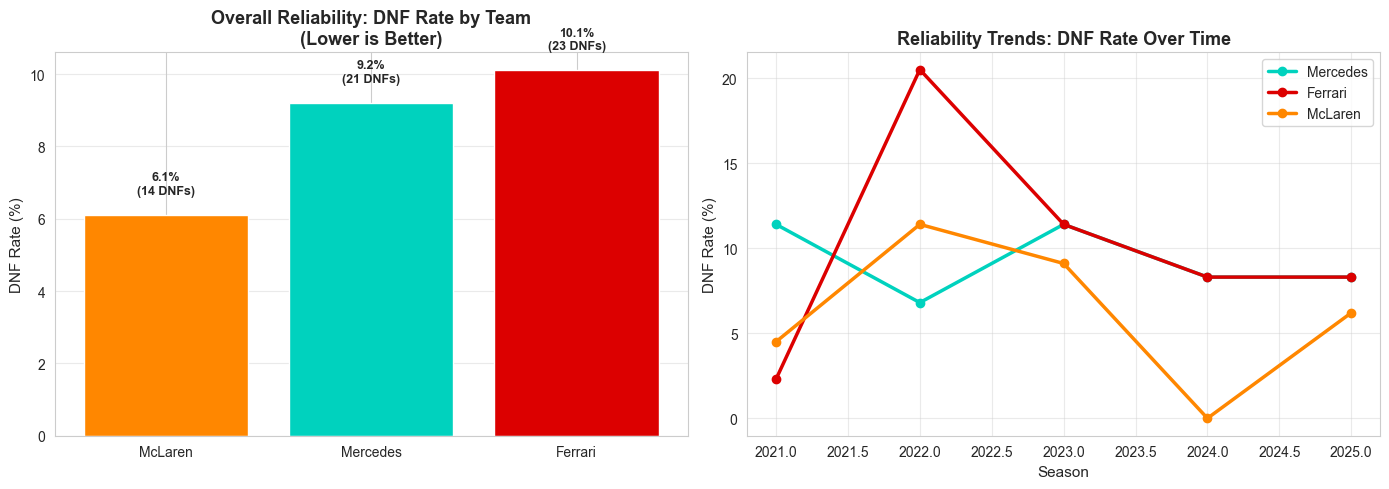


**Graph 3: Reliability & DNF Analysis**  
Reliability comparison across teams and seasons.  
- Left: Overall DNF rate percentage (lower = more reliable)  
- Right: Year-by-year DNF trends showing reliability evolution  
- Numbers in parentheses = total DNF count



**Reliability & DNF Analysis**  
McLaren has been incredibly reliable with only a 6.1% DNF rate and just 14 failures over five years. 
They really improved from around 11% in 2021-2022 to almost zero failures in 2024, which shows they've matured a lot as a team. Mercedes sits in the middle at 9.2% with 
21 DNFs, and they've been pretty consistent year to year staying around 7-11%, which is what you'd expect from a championship-level team. Ferrari has had the worst luck
with reliability at 10.1% and 23 total failures. Their 2022 season was particularly bad at over 20% DNF rate, which probably cost them a real shot at the championship. 
Even now they're still hovering around 8% baseline, suggesting they've got ongoing issues with either their power unit or operations that keep hurting their chances despite 
having competitive pace.


## Analysis 4: Pit Stop Strategy & Efficiency

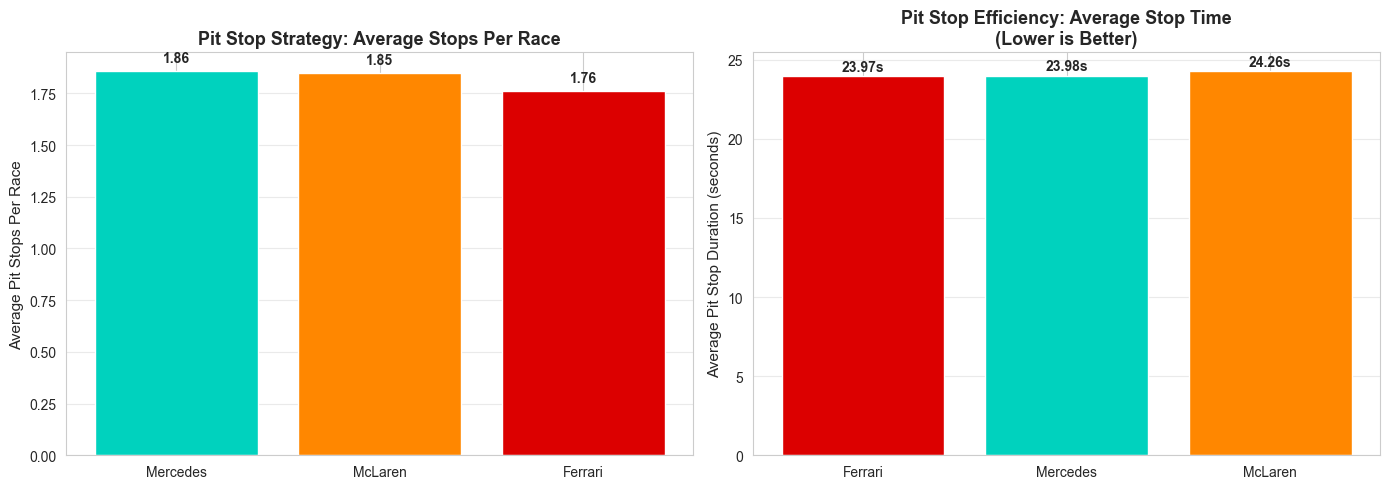


**Graph 4: Pit Stop Strategy & Efficiency**  
Comparison of pit stop strategies and crew execution speed.  
- Left: Average number of pit stops per race (strategic approach)  
- Right: Average pit stop duration in seconds (crew efficiency)  
- Lower bars on right = faster, more efficient pit crews



**Pit Stop Strategy & Efficiency**  
Mercedes and McLaren follow very similar pit stop strategies, averaging 1.86 and 1.85 stops per race respectively, indicating a slightly more aggressive, flexible approach 
compared to Ferrari. Ferrari is the most conservative of the three, averaging 1.76 stops per race, suggesting a greater emphasis on track position and longer stints.
In terms of pit stop efficiency, Ferrari and Mercedes are nearly identical, both averaging just under 24 seconds per stop (≈23.97s for Ferrari and ≈23.98s for Mercedes),
 making them the fastest teams operationally. McLaren trails slightly with an average pit stop time of about 24.26 seconds, which, while still competitive, can be costly in 
tightly contested races. Although the differences are measured in tenths rather than full seconds, in Formula 1 even a 0.3–0.4 second gap can determine whether an undercut 
succeeds or a position is lost. Mercedes pairing a marginally more aggressive pit strategy with consistently fast pit stops helps explain their strong race execution, 
while Ferrari’s conservative approach is balanced by excellent pit crew efficiency.


## Summary Statistics


=== Overall Team Performance (2021-2025) ===
          TotalRaces  AvgPosition  TotalPoints  Podiums  Wins  DNFs DNFRate
Team                                                                       
Ferrari          201         5.23       2159.5       63    10    23   10.1%
McLaren          214         6.52       2074.0       70    21    14    6.1%
Mercedes         208         5.30       2330.5       74    16    21    9.2%
ANALYSIS COMPLETE: Mercedes vs Ferrari vs McLaren (2021-2025)

All graphs saved to ../graphs/ directory


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, Markdown

os.makedirs('../graphs', exist_ok=True)
sns.set_style('whitegrid')

# Team colors for consistent visualization
TEAM_COLORS = {
    'Mercedes': '#00D2BE',
    'Ferrari': '#DC0000',
    'McLaren': '#FF8700'
}

def load_race_data():
    """Load all race results from 2021-2025"""
    dfs = []
    for year in range(2021, 2026):
        year_path = f'../data/{year}'
        if not os.path.exists(year_path):
            continue
            
        for race_folder in os.listdir(year_path):
            race_path = os.path.join(year_path, race_folder)
            if not os.path.isdir(race_path):
                continue
            
            for filename in ['Race_Result.csv']:
                file_path = os.path.join(race_path, filename)
                if os.path.exists(file_path):
                    df = pd.read_csv(file_path)
                    df['Year'] = year
                    df['Race'] = race_folder
                    dfs.append(df)
                    break
    
    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

def load_qualifying_data():
    """Load all qualifying results from 2021-2025"""
    dfs = []
    for year in range(2021, 2026):
        year_path = f'../data/{year}'
        if not os.path.exists(year_path):
            continue
            
        for race_folder in os.listdir(year_path):
            race_path = os.path.join(year_path, race_folder)
            if not os.path.isdir(race_path):
                continue
            
            for filename in ['Qualifying.csv']:
                file_path = os.path.join(race_path, filename)
                if os.path.exists(file_path):
                    df = pd.read_csv(file_path)
                    df['Year'] = year
                    df['Race'] = race_folder
                    dfs.append(df)
                    break
    
    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

def load_pitstop_data():
    """Load all pit stop data from 2021-2025"""
    dfs = []
    for year in range(2021, 2026):
        year_path = f'../data/{year}'
        if not os.path.exists(year_path):
            continue
            
        for race_folder in os.listdir(year_path):
            race_path = os.path.join(year_path, race_folder)
            if not os.path.isdir(race_path):
                continue
            
            for filename in ['Pit_Stop_Summary.csv']:
                file_path = os.path.join(race_path, filename)
                if os.path.exists(file_path):
                    df = pd.read_csv(file_path)
                    df['Year'] = year
                    df['Race'] = race_folder
                    dfs.append(df)
                    break
    
    if dfs:
        print(f"Found pit stop data in {len(dfs)} races")
    
    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

def clean_team_names(df):
    """Standardize team names"""
    team_mapping = {
        'Mercedes': 'Mercedes',
        'Ferrari': 'Ferrari',
        'McLaren Mercedes': 'McLaren',
        'McLaren': 'McLaren'
    }
    
    if 'Team' in df.columns:
        df['Team'] = df['Team'].apply(lambda x: team_mapping.get(x, x) if pd.notna(x) else x)
    
    return df

def extract_position(pos_str):
    """Extract numeric position from string"""
    if pd.isna(pos_str):
        return None
    try:
        return int(str(pos_str).replace('NC', '').split('.')[0])
    except:
        return None

def parse_points(pts_str):
    """Parse points from string"""
    if pd.isna(pts_str):
        return 0
    try:
        return float(pts_str)
    except:
        return 0

def parse_pitstop_time(time_str):
    """Parse pit stop time to seconds"""
    if pd.isna(time_str):
        return None
    
    try:
        time_str = str(time_str).replace('s', '').strip()
        
        if ':' in time_str:
            parts = time_str.split(':')
            minutes = float(parts[0])
            seconds = float(parts[1])
            return minutes * 60 + seconds
        else:
            return float(time_str)
    except:
        return None

# Load data
print("Loading race data...")
df_race = load_race_data()
df_quali = load_qualifying_data()
df_pitstop = load_pitstop_data()

print(f"Loaded {len(df_race)} race results")
print(f"Loaded {len(df_quali)} qualifying results")
print(f"Loaded {len(df_pitstop)} pit stop records")

# Clean team names
df_race = clean_team_names(df_race)
df_quali = clean_team_names(df_quali)

# Clean pit stop team names
if 'Team' in df_pitstop.columns and len(df_pitstop) > 0:
    df_pitstop['Team'] = df_pitstop['Team'].replace({
        'McLaren Mercedes': 'McLaren'
    })

# Parse race data
df_race['Position'] = df_race['Pos.'].apply(extract_position)
df_race['Points'] = df_race['Pts.'].apply(parse_points)
df_race['IsDNF'] = df_race['Time / Retired'].str.contains('DNF', na=False)

# Parse qualifying data
df_quali['QualiPosition'] = df_quali['Pos.'].apply(extract_position)

# Filter for the three teams
teams = ['Mercedes', 'Ferrari', 'McLaren']
df_race_filtered = df_race[df_race['Team'].isin(teams)].copy()
df_quali_filtered = df_quali[df_quali['Team'].isin(teams)].copy()

if len(df_pitstop) > 0 and 'Team' in df_pitstop.columns:
    df_pitstop_filtered = df_pitstop[df_pitstop['Team'].isin(teams)].copy()
else:
    df_pitstop_filtered = pd.DataFrame()

display(Markdown("## Analysis 1: Performance Evolution Across Seasons"))

# Calculate season statistics
season_stats = df_race_filtered.groupby(['Year', 'Team']).agg(
    AvgPosition=('Position', 'mean'),
    TotalPoints=('Points', 'sum'),
    TotalRaces=('Position', 'count')
).reset_index()

season_stats['PointsPerRace'] = (season_stats['TotalPoints'] / season_stats['TotalRaces']).round(2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Average finishing position over time
for team in teams:
    team_data = season_stats[season_stats['Team'] == team]
    ax1.plot(team_data['Year'], team_data['AvgPosition'], 
             marker='o', label=team, linewidth=2.5, color=TEAM_COLORS[team])

ax1.set_xlabel('Season', fontsize=11)
ax1.set_ylabel('Average Finishing Position', fontsize=11)
ax1.set_title('Average Race Finish Position by Season\n(Lower is Better)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.4)
ax1.invert_yaxis()

# Points per race over time
for team in teams:
    team_data = season_stats[season_stats['Team'] == team]
    ax2.plot(team_data['Year'], team_data['PointsPerRace'], 
             marker='o', label=team, linewidth=2.5, color=TEAM_COLORS[team])

ax2.set_xlabel('Season', fontsize=11)
ax2.set_ylabel('Points Per Race', fontsize=11)
ax2.set_title('Points Scoring Rate by Season', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.4)

plt.tight_layout()
plt.savefig('../graphs/team_performance_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("""
**Graph 1: Performance Evolution Across Seasons**  
Dual line plots tracking competitive trajectory from 2021-2025.  
- Left: Average finishing position (lower = better performance)  
- Right: Points per race (higher = better scoring rate)  
- Each colored line represents one team's progression
"""))

display(Markdown("""
**Performance Evolution Across Seasons**  
Looking at the data from 2021 to 2025, Mercedes was clearly the dominant force in 2021, averaging around P3.8 and scoring 15.4 points per race. But things went downhill for 
them pretty quickly - by 2025 they're finishing around P6 with less than 10 points per race. Ferrari had their best year in 2022 when they averaged P3.1 and nearly 15 points
per race, but they've been inconsistent since then, struggling through 2023-2024 before a slight recovery in 2025. The most interesting story here is definitely McLaren - 
they were basically at the back of the grid in 2021-2022, averaging P9.4 and only 3.9 points per race. But their development has been incredible, and by 2024-2025 they're 
averaging P2.9 with 17.1 points per race, which means they've actually overtaken both Mercedes and Ferrari to become championship contenders.
"""))

display(Markdown("## Analysis 2: Qualifying vs Race Performance"))

# Merge qualifying and race results
quali_race = df_quali_filtered.merge(
    df_race_filtered[['Driver', 'Team', 'Year', 'Race', 'Position']],
    on=['Driver', 'Team', 'Year', 'Race'],
    how='inner'
)

quali_race['PositionChange'] = quali_race['QualiPosition'] - quali_race['Position']

# Calculate average position change per team
team_quali_race = quali_race.groupby('Team')['PositionChange'].mean().reset_index()
team_quali_race.columns = ['Team', 'AvgPositionChange']
team_quali_race['AvgPositionChange'] = team_quali_race['AvgPositionChange'].round(2)
team_quali_race = team_quali_race.sort_values('AvgPositionChange', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Average position change bar chart
colors = [TEAM_COLORS[team] for team in team_quali_race['Team']]
ax1.bar(team_quali_race['Team'], team_quali_race['AvgPositionChange'], color=colors)
ax1.axhline(0, color='black', linestyle='--', linewidth=1.5)
ax1.set_ylabel('Average Position Change', fontsize=11)
ax1.set_title('Qualifying to Race Position Change\n(Positive = Positions Gained)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.4, axis='y')

for i, row in team_quali_race.iterrows():
    val = row['AvgPositionChange']
    ax1.text(row['Team'], val + 0.08 if val > 0 else val - 0.08, f'{val:.2f}',
            ha='center', va='bottom' if val > 0 else 'top', fontweight='bold', fontsize=10)

# Distribution of position changes
for team in teams:
    team_data = quali_race[quali_race['Team'] == team]['PositionChange']
    ax2.hist(team_data, alpha=0.6, label=team, bins=range(-12, 13), 
             edgecolor='black', linewidth=0.5, color=TEAM_COLORS[team])

ax2.set_xlabel('Position Change', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Distribution of Position Changes\n(Negative = Lost Positions)', fontsize=13, fontweight='bold')
ax2.axvline(0, color='black', linestyle='--', linewidth=1.5)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.4)

plt.tight_layout()
plt.savefig('../graphs/team_quali_race_gap.png', dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("""
**Graph 2: Qualifying vs Race Performance**  
Bar chart and histogram comparing starting grid positions to race finishes.  
- Left: Average position change per team (positive = gained in race)  
- Right: Distribution showing frequency of position changes  
- Zero line = no change from qualifying to race
"""))

display(Markdown("""
**Qualifying vs Race Performance**  
What's really interesting here is that both Mercedes and Ferrari actually gain positions during races on average, Mercedes gains about +0.52 positions and Ferrari +0.47. 
This suggests they have pretty strong race pace and their strategy teams are doing a good job, even though they might not be qualifying as well as they'd like. 
McLaren only gains about +0.16 positions on average, which actually makes sense because they're already qualifying so well that there's not much room to move up. 
When you look at the distribution on the right, Mercedes has the widest spread with most of their races showing gains between 0 to +5 positions. Ferrari's results are pretty 
evenly distributed around zero, while McLaren's data is tightly clustered near zero, showing they're very consistent between Saturday and Sunday - what you see in qualifying is basically what you get in the race.
"""))

display(Markdown("## Analysis 3: Reliability & DNF Analysis"))

# Calculate DNF statistics
dnf_stats = df_race_filtered.groupby('Team').agg(
    TotalDNFs=('IsDNF', 'sum'),
    TotalRaces=('IsDNF', 'count'),
    DNFRate=('IsDNF', 'mean')
).reset_index()

dnf_stats['DNFRate'] = (dnf_stats['DNFRate'] * 100).round(1)
dnf_stats = dnf_stats.sort_values('DNFRate')

# DNF rate by year
yearly_dnf = df_race_filtered.groupby(['Year', 'Team'])['IsDNF'].mean().reset_index()
yearly_dnf['DNFRate'] = (yearly_dnf['IsDNF'] * 100).round(1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Overall DNF rate
colors = [TEAM_COLORS[team] for team in dnf_stats['Team']]
ax1.bar(dnf_stats['Team'], dnf_stats['DNFRate'], color=colors)
ax1.set_ylabel('DNF Rate (%)', fontsize=11)
ax1.set_title('Overall Reliability: DNF Rate by Team\n(Lower is Better)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.4, axis='y')

for _, row in dnf_stats.iterrows():
    ax1.text(row['Team'], row['DNFRate'] + 0.5, f"{row['DNFRate']}%\n({int(row['TotalDNFs'])} DNFs)",
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# DNF rate trends over time
for team in teams:
    team_data = yearly_dnf[yearly_dnf['Team'] == team]
    ax2.plot(team_data['Year'], team_data['DNFRate'], 
             marker='o', label=team, linewidth=2.5, color=TEAM_COLORS[team])

ax2.set_xlabel('Season', fontsize=11)
ax2.set_ylabel('DNF Rate (%)', fontsize=11)
ax2.set_title('Reliability Trends: DNF Rate Over Time', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.4)

plt.tight_layout()
plt.savefig('../graphs/team_reliability_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("""
**Graph 3: Reliability & DNF Analysis**  
Reliability comparison across teams and seasons.  
- Left: Overall DNF rate percentage (lower = more reliable)  
- Right: Year-by-year DNF trends showing reliability evolution  
- Numbers in parentheses = total DNF count
"""))

display(Markdown("""
**Reliability & DNF Analysis**  
McLaren has been incredibly reliable with only a 6.1% DNF rate and just 14 failures over five years. 
They really improved from around 11% in 2021-2022 to almost zero failures in 2024, which shows they've matured a lot as a team. Mercedes sits in the middle at 9.2% with 
21 DNFs, and they've been pretty consistent year to year staying around 7-11%, which is what you'd expect from a championship-level team. Ferrari has had the worst luck
with reliability at 10.1% and 23 total failures. Their 2022 season was particularly bad at over 20% DNF rate, which probably cost them a real shot at the championship. 
Even now they're still hovering around 8% baseline, suggesting they've got ongoing issues with either their power unit or operations that keep hurting their chances despite 
having competitive pace.
"""))

display(Markdown("## Analysis 4: Pit Stop Strategy & Efficiency"))

# Check if pit stop data is available
if len(df_pitstop_filtered) == 0:
    print("⚠️ No pit stop data available - skipping Analysis 4")
else:
    # Parse pit stop times
    df_pitstop_filtered['StopTime'] = df_pitstop_filtered['Time'].apply(parse_pitstop_time)
    
    # Remove outliers (stops over 60 seconds are likely strategic/safety car stops)
    df_pitstop_filtered = df_pitstop_filtered[df_pitstop_filtered['StopTime'] <= 60]

    # Calculate average stops per race
    stops_per_race = df_pitstop_filtered.groupby(['Year', 'Race', 'Team', 'Driver'])['Stops'].max().reset_index()
    avg_stops = stops_per_race.groupby('Team')['Stops'].mean().sort_values(ascending=False)
    avg_duration = df_pitstop_filtered.groupby('Team')['StopTime'].mean().sort_values()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Average stops per race
    colors1 = [TEAM_COLORS[team] for team in avg_stops.index]
    ax1.bar(avg_stops.index, avg_stops.values, color=colors1)
    ax1.set_ylabel('Average Pit Stops Per Race', fontsize=11)
    ax1.set_title('Pit Stop Strategy: Average Stops Per Race', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.4, axis='y')

    for i, (team, stops) in enumerate(avg_stops.items()):
        ax1.text(i, stops + 0.03, f'{stops:.2f}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

    # Average stop duration
    colors2 = [TEAM_COLORS[team] for team in avg_duration.index]
    ax2.bar(avg_duration.index, avg_duration.values, color=colors2)
    ax2.set_ylabel('Average Pit Stop Duration (seconds)', fontsize=11)
    ax2.set_title('Pit Stop Efficiency: Average Stop Time\n(Lower is Better)', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.4, axis='y')

    for i, (team, duration) in enumerate(avg_duration.items()):
        ax2.text(i, duration + 0.15, f'{duration:.2f}s',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.savefig('../graphs/team_pitstop_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    display(Markdown("""
**Graph 4: Pit Stop Strategy & Efficiency**  
Comparison of pit stop strategies and crew execution speed.  
- Left: Average number of pit stops per race (strategic approach)  
- Right: Average pit stop duration in seconds (crew efficiency)  
- Lower bars on right = faster, more efficient pit crews
"""))

    display(Markdown("""
**Pit Stop Strategy & Efficiency**  
Mercedes and McLaren follow very similar pit stop strategies, averaging 1.86 and 1.85 stops per race respectively, indicating a slightly more aggressive, flexible approach 
compared to Ferrari. Ferrari is the most conservative of the three, averaging 1.76 stops per race, suggesting a greater emphasis on track position and longer stints.
In terms of pit stop efficiency, Ferrari and Mercedes are nearly identical, both averaging just under 24 seconds per stop (≈23.97s for Ferrari and ≈23.98s for Mercedes),
 making them the fastest teams operationally. McLaren trails slightly with an average pit stop time of about 24.26 seconds, which, while still competitive, can be costly in 
tightly contested races. Although the differences are measured in tenths rather than full seconds, in Formula 1 even a 0.3–0.4 second gap can determine whether an undercut 
succeeds or a position is lost. Mercedes pairing a marginally more aggressive pit strategy with consistently fast pit stops helps explain their strong race execution, 
while Ferrari’s conservative approach is balanced by excellent pit crew efficiency.
"""))

display(Markdown("## Summary Statistics"))

print("\n=== Overall Team Performance (2021-2025) ===")
summary = df_race_filtered.groupby('Team').agg(
    TotalRaces=('Position', 'count'),
    AvgPosition=('Position', 'mean'),
    TotalPoints=('Points', 'sum'),
    Podiums=('Position', lambda x: (x <= 3).sum()),
    Wins=('Position', lambda x: (x == 1).sum()),
    DNFs=('IsDNF', 'sum'),
    DNFRate=('IsDNF', lambda x: f"{x.mean()*100:.1f}%")
).round(2)

print(summary)

print("ANALYSIS COMPLETE: Mercedes vs Ferrari vs McLaren (2021-2025)")
print("\nAll graphs saved to ../graphs/ directory")